In [1]:
import os
import imp
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import sys
import pickle
import matplotlib.ticker as plticker
import mat73
#os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
#lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py') 

sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi
sys.path.append(os.path.dirname('/media/lucas/datam01/LucasLobo/RessonanceRIng')) #Current directory


from jupyterthemes import jtplot
jtplot.style(theme='onedork', context='notebook', ticks=True, grid=True)
plt.rcParams["figure.figsize"] = (15,7)

# FDTD

## MMI

In [111]:
fdtd = lumapi.FDTD(filename='FDTD_MMI_2X2.fsp')

dict_keys(['lambda', 'f', 'T', 'Lumerical_dataset'])


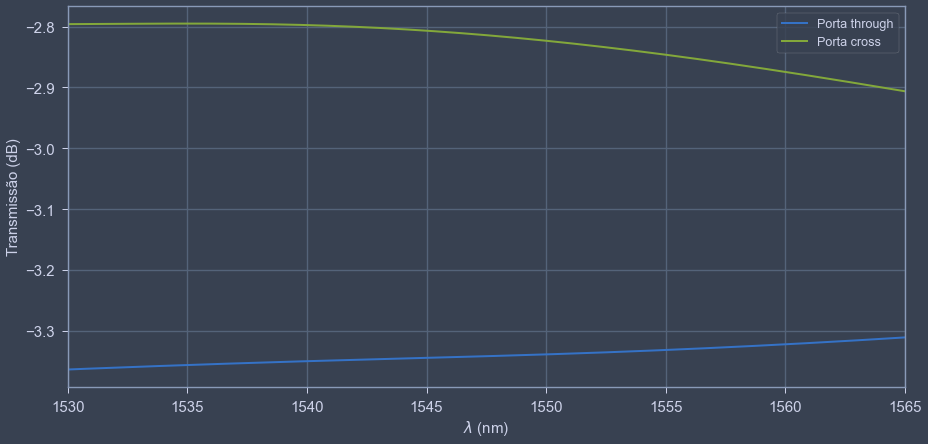

In [6]:
Tthrough = fdtd.getresult('FDTD::ports::port3','T')
Tcross = fdtd.getresult('FDTD::ports::port4','T')

print(Tthrough.keys())
plt.plot(Tthrough['lambda']*1e9,10*np.log10(Tthrough['T']),linewidth=2,label='Porta through')
plt.plot(Tthrough['lambda']*1e9,10*np.log10(Tcross['T']),linewidth=2,label='Porta cross')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Transmissão (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()

dict_keys(['lambda', 'f', 'T', 'Lumerical_dataset'])


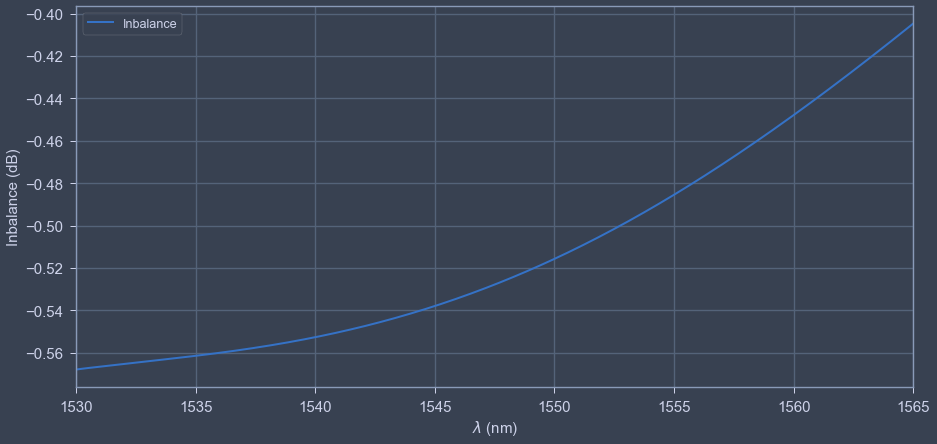

In [7]:
Tthrough = fdtd.getresult('FDTD::ports::port3','T')
Tcross = fdtd.getresult('FDTD::ports::port4','T')

print(Tthrough.keys())
plt.plot(Tthrough['lambda']*1e9,10*np.log10(Tthrough['T']/Tcross['T']),linewidth=2,label='Inbalance')

plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Inbalance (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()

dict_keys(['lambda', 'f', 'T', 'Lumerical_dataset'])


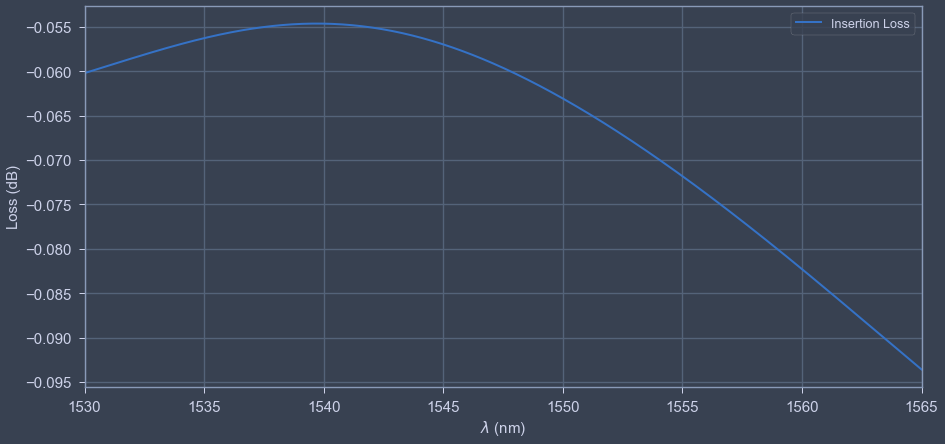

In [8]:
Tthrough = fdtd.getresult('FDTD::ports::port3','T')
Tcross = fdtd.getresult('FDTD::ports::port4','T')

print(Tthrough.keys())
plt.plot(Tthrough['lambda']*1e9,10*np.log10(Tthrough['T']+Tcross['T']),linewidth=2,label='Insertion Loss')

plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Loss (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()

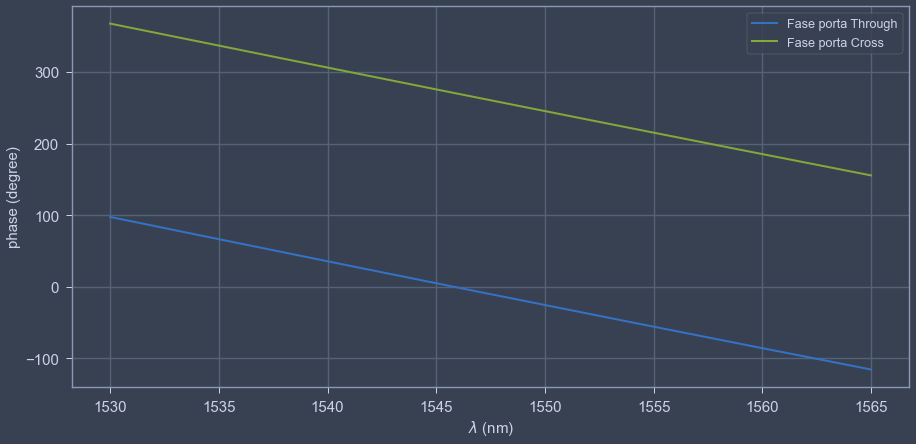

In [9]:
Sthrough = fdtd.getresult('FDTD::ports::port3','S')
Scross = fdtd.getresult('FDTD::ports::port4','S')

dados = mat73.loadmat('DadosPhaseMMI2.mat')['lum']
x = dados['x0'] 
fasethrough = dados['y0'] 
fasecross = dados['y1'] 

plt.plot(x,fasethrough,linewidth=2,label='Fase porta Through')
plt.plot(x,fasecross,linewidth=2,label='Fase porta Cross')
#plt.xlim(1545,1555)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'phase (degree)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()




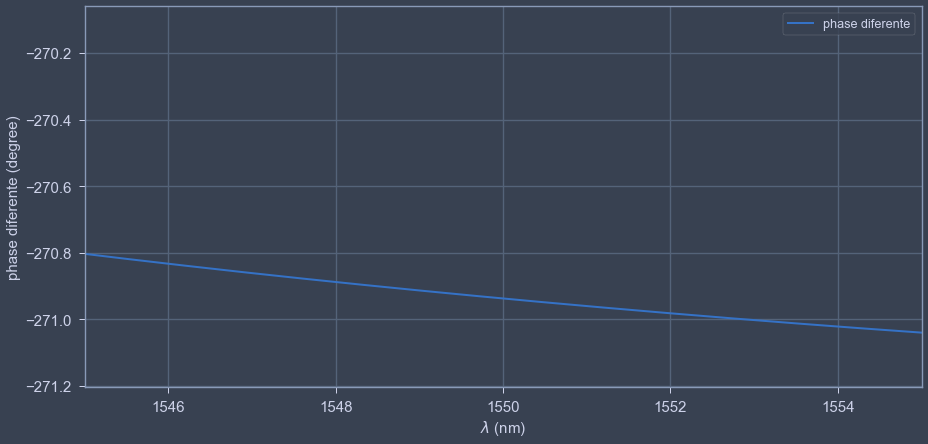

In [12]:
Sthrough = fdtd.getresult('FDTD::ports::port3','S')
Scross = fdtd.getresult('FDTD::ports::port4','S')

dados = mat73.loadmat('DadosPhaseMMI2.mat')['lum']
x = dados['x0'] 
fasethrough = dados['y0'] 
fasecross = dados['y1'] 

plt.plot(x,(fasethrough-fasecross),linewidth=2,label='phase diferente')
#plt.plot(x,fasecross,linewidth=2,label='Fase porta Cross')
plt.xlim(1545,1555)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'phase diferente (degree)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()

## Y Branch

In [2]:
fdtd = lumapi.FDTD(filename='FDTD_Y_Branch.fsp')

dict_keys(['lambda', 'f', 'T', 'Lumerical_dataset'])


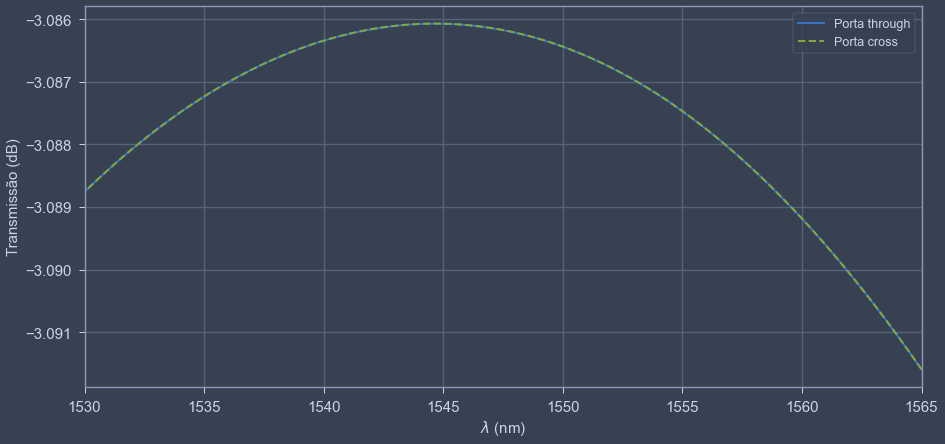

In [3]:
Out1 = fdtd.getresult('FDTD::ports::port 2','T')
Out2 = fdtd.getresult('FDTD::ports::port 3','T')

print(Out1.keys())
plt.plot(Out1['lambda']*1e9,10*np.log10(Out1['T']),linewidth=2,label='Porta through')
plt.plot(Out1['lambda']*1e9,10*np.log10(Out2['T']),linewidth=2,label='Porta cross',linestyle='--')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Transmissão (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()

dict_keys(['lambda', 'f', 'T', 'Lumerical_dataset'])


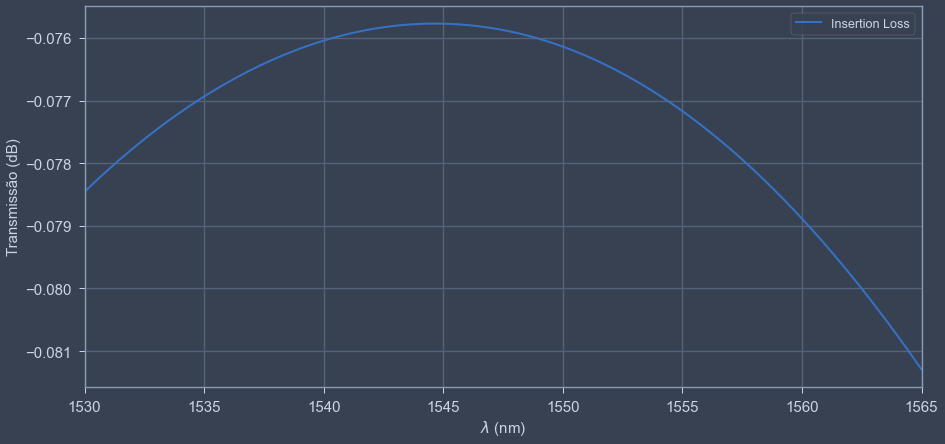

In [4]:
Out1 = fdtd.getresult('FDTD::ports::port 2','T')
Out2 = fdtd.getresult('FDTD::ports::port 3','T')

print(Out1.keys())
plt.plot(Out1['lambda']*1e9,10*np.log10(Out1['T']+Out2['T']),linewidth=2,label='Insertion Loss')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Transmissão (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()

## Bend

In [2]:
fdtd = lumapi.FDTD(filename='FDTD_Bend.fsp')

dict_keys(['lambda', 'f', 'T', 'Lumerical_dataset'])


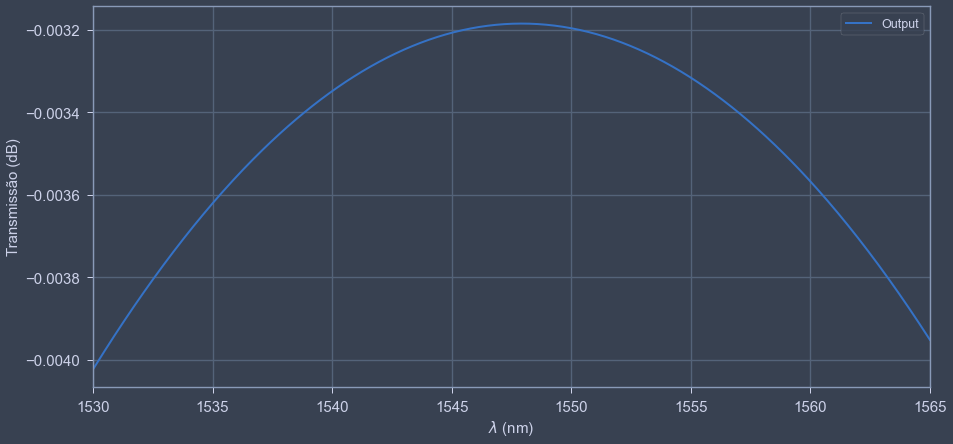

In [3]:
Out1 = fdtd.getresult('FDTD::ports::port 2','T')


print(Out1.keys())
plt.plot(Out1['lambda']*1e9,10*np.log10(abs(Out1['T'])),linewidth=2,label='Output')
#plt.plot(Out1['lambda']*1e9,(Out1['T']),linewidth=2,label='Output')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Transmissão (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()

# Hibrida

## LO

In [33]:
fdtd = lumapi.FDTD(filename='Hibrid_LO.fsp')

dict_keys(['lambda', 'f', 'T', 'Lumerical_dataset'])


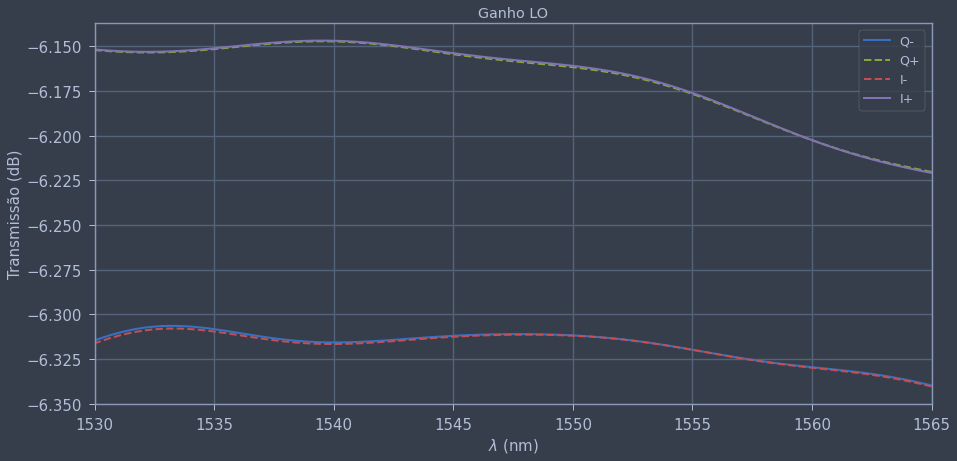

In [12]:
Qn = fdtd.getresult('FDTD::ports::Q-','T')
print(Qn.keys())
plt.plot(Qn['lambda']*1e9,10*np.log10(abs(Qn['T'])),linewidth=2,label='Q-')

Qp = fdtd.getresult('FDTD::ports::Q+','T')
plt.plot(Qp['lambda']*1e9,10*np.log10(abs(Qp['T'])),'--',linewidth=2,label='Q+')

In = fdtd.getresult('FDTD::ports::I-','T')
plt.plot(In['lambda']*1e9,10*np.log10(abs(In['T'])),'--',linewidth=2,label='I-')

Ip = fdtd.getresult('FDTD::ports::I+','T')
plt.plot(Ip['lambda']*1e9,10*np.log10(abs(Ip['T'])),linewidth=2,label='I+')

plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Transmissão (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Ganho LO')
plt.legend()

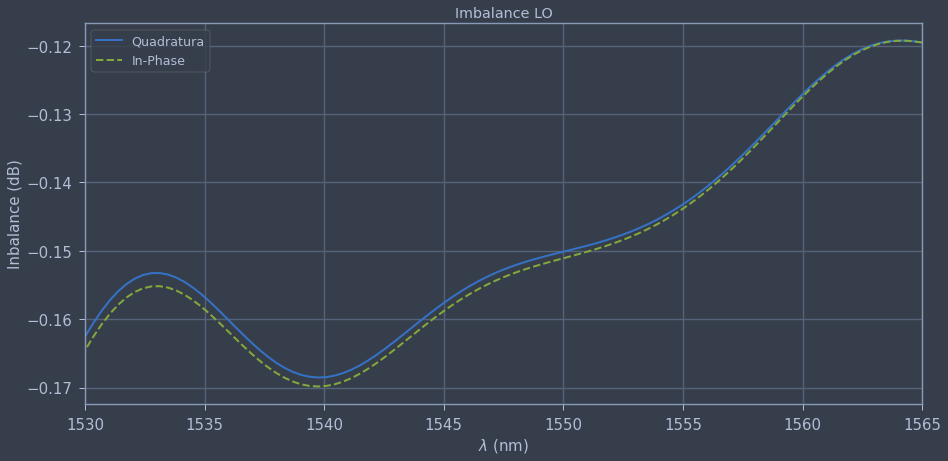

In [13]:
plt.plot(Qn['lambda']*1e9,10*np.log10(abs(Qn['T']/Qp['T'])),linewidth=2,label='Quadratura')
plt.plot(Qn['lambda']*1e9,10*np.log10(abs(In['T']/Ip['T'])),'--',linewidth=2,label='In-Phase')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Inbalance (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Imbalance LO')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


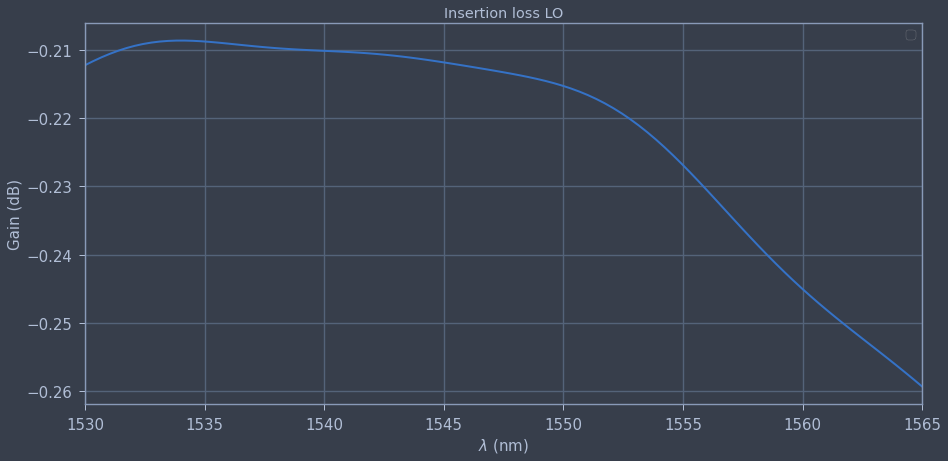

In [14]:
plt.plot(Qn['lambda']*1e9,10*np.log10(abs(Qn['T'])+abs(Qp['T'])+abs(In['T'])+abs(Ip['T'])),linewidth=2)
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Gain (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Insertion loss LO')
plt.legend()

dict_keys(['lambda', 'f', 'T', 'Lumerical_dataset'])


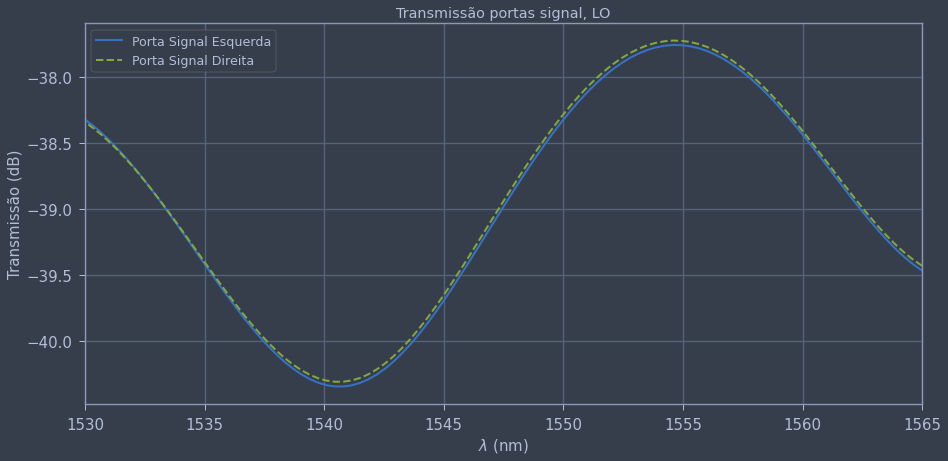

In [15]:
Qn = fdtd.getresult('FDTD::ports::Signal1','T')
print(Qn.keys())
plt.plot(Qn['lambda']*1e9,10*np.log10(abs(Qn['T'])),linewidth=2,label='Porta Signal Esquerda')

Qp = fdtd.getresult('FDTD::ports::Signal2','T')
plt.plot(Qp['lambda']*1e9,10*np.log10(abs(Qp['T'])),'--',linewidth=2,label='Porta Signal Direita')

plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Transmissão (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Transmissão portas signal, LO')
plt.legend()

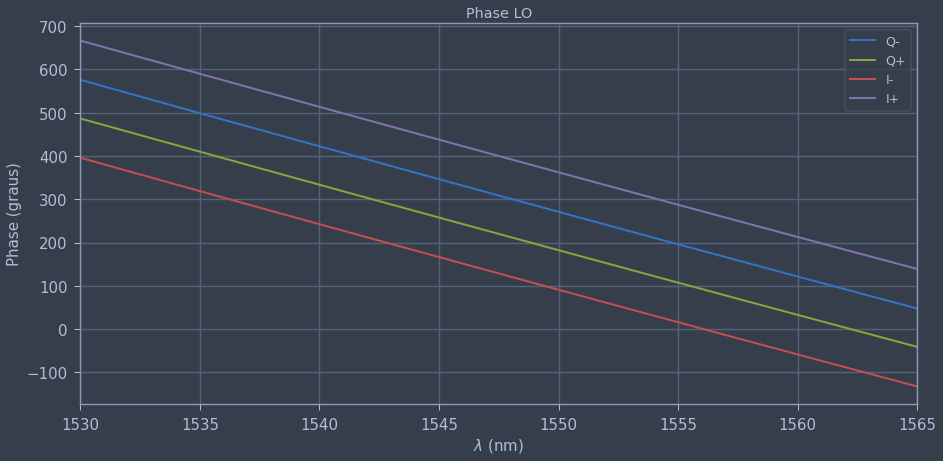

In [16]:
Qn = fdtd.getresult('FDTD::ports::Q-','S')
plt.plot(Qn['lambda']*1e9,fdtd.unwrap(fdtd.angle(Qn['S']))*180/np.pi,linewidth=2,label='Q-')
Qp = fdtd.getresult('FDTD::ports::Q+','S')
plt.plot(Qp['lambda']*1e9,fdtd.unwrap(fdtd.angle(Qp['S']))*180/np.pi,linewidth=2,label='Q+')
In = fdtd.getresult('FDTD::ports::I-','S')
plt.plot(In['lambda']*1e9,fdtd.unwrap(fdtd.angle(In['S']))*180/np.pi,linewidth=2,label='I-')
Ip = fdtd.getresult('FDTD::ports::I+','S')
plt.plot(Ip['lambda']*1e9,fdtd.unwrap(fdtd.angle(Ip['S']))*180/np.pi,linewidth=2,label='I+')

plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Phase (graus)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Phase LO')
plt.legend()

Text(0.5, 1.0, 'Phase diference Quadratura, LO')

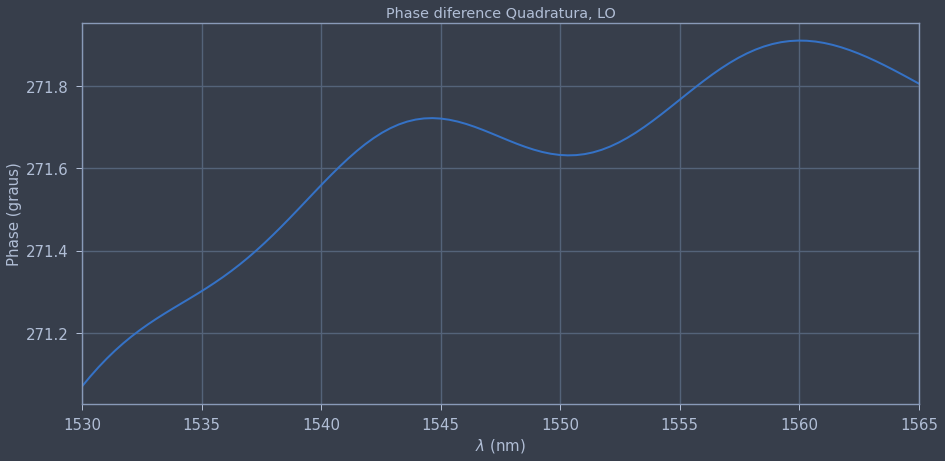

In [27]:
plt.plot(Qn['lambda']*1e9,(fdtd.unwrap(fdtd.angle(Qn['S']))-fdtd.unwrap(fdtd.angle(Qp['S'])))*180/np.pi,linewidth=2,label='Quadratura')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Phase (graus)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Phase diference Quadratura, LO')

Text(0.5, 1.0, 'Phase diference In-Phase, LO')

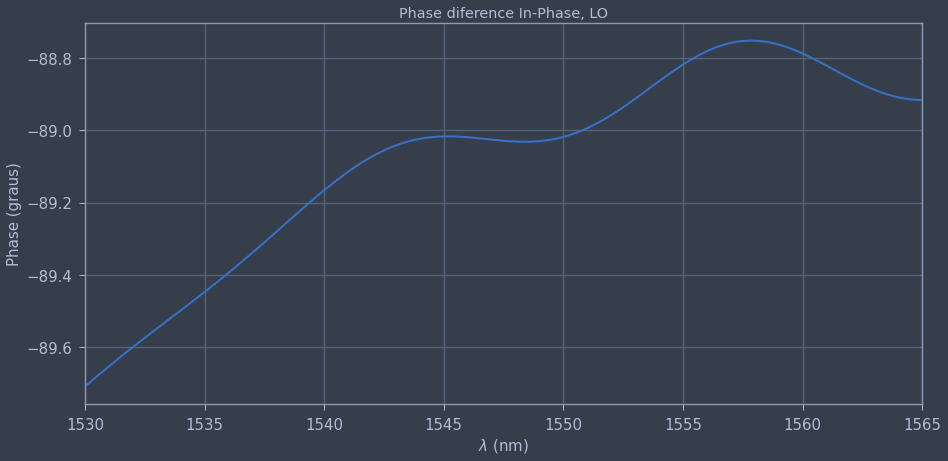

In [29]:
plt.plot(Qn['lambda']*1e9,(fdtd.unwrap(fdtd.angle(In['S']))-fdtd.unwrap(fdtd.angle(Ip['S'])))*180/np.pi,linewidth=2,label='Phase')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Phase (graus)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Phase diference In-Phase, LO')


## Signal

In [18]:
fdtd = lumapi.FDTD(filename='Hibrid_Signal.fsp')

dict_keys(['lambda', 'f', 'T', 'Lumerical_dataset'])


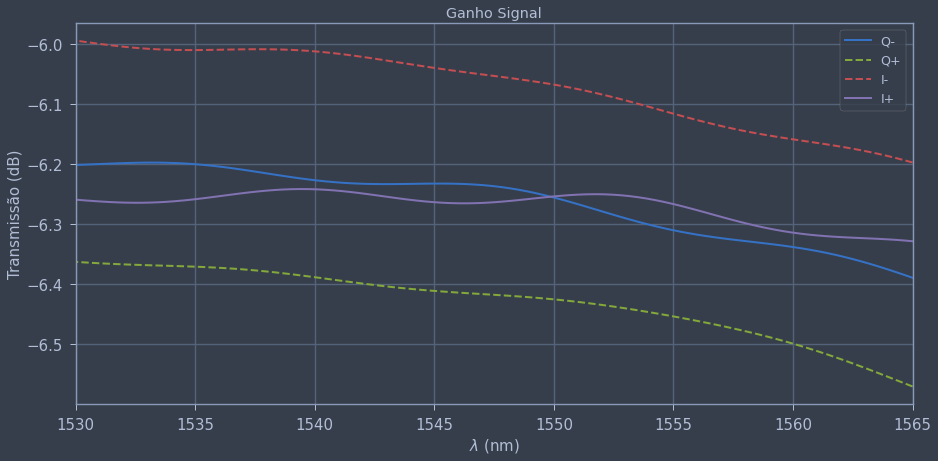

In [19]:
Qn = fdtd.getresult('FDTD::ports::Q-','T')
print(Qn.keys())
plt.plot(Qn['lambda']*1e9,10*np.log10(abs(Qn['T'])),linewidth=2,label='Q-')

Qp = fdtd.getresult('FDTD::ports::Q+','T')
plt.plot(Qp['lambda']*1e9,10*np.log10(abs(Qp['T'])),'--',linewidth=2,label='Q+')

In = fdtd.getresult('FDTD::ports::I-','T')
plt.plot(In['lambda']*1e9,10*np.log10(abs(In['T'])),'--',linewidth=2,label='I-')

Ip = fdtd.getresult('FDTD::ports::I+','T')
plt.plot(Ip['lambda']*1e9,10*np.log10(abs(Ip['T'])),linewidth=2,label='I+')

plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Transmissão (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Ganho Signal')
plt.legend()

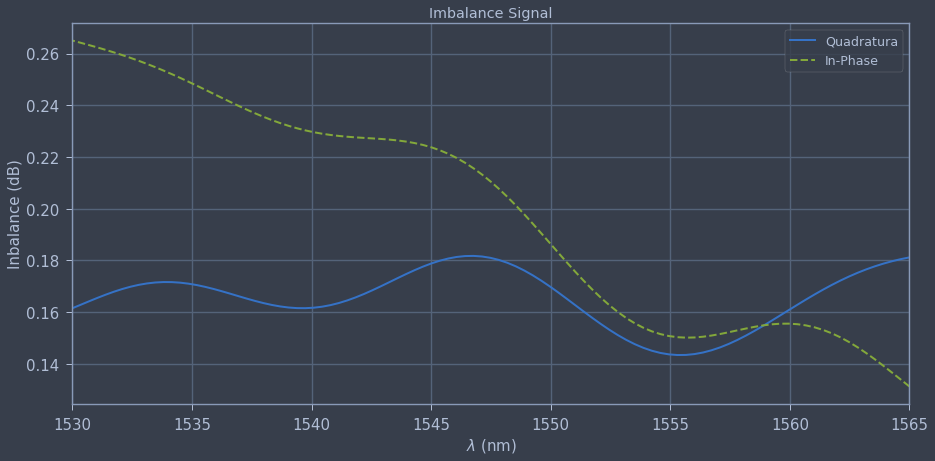

In [20]:
plt.plot(Qn['lambda']*1e9,10*np.log10(abs(Qn['T']/Qp['T'])),linewidth=2,label='Quadratura')
plt.plot(Qn['lambda']*1e9,10*np.log10(abs(In['T']/Ip['T'])),'--',linewidth=2,label='In-Phase')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Inbalance (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Imbalance Signal')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


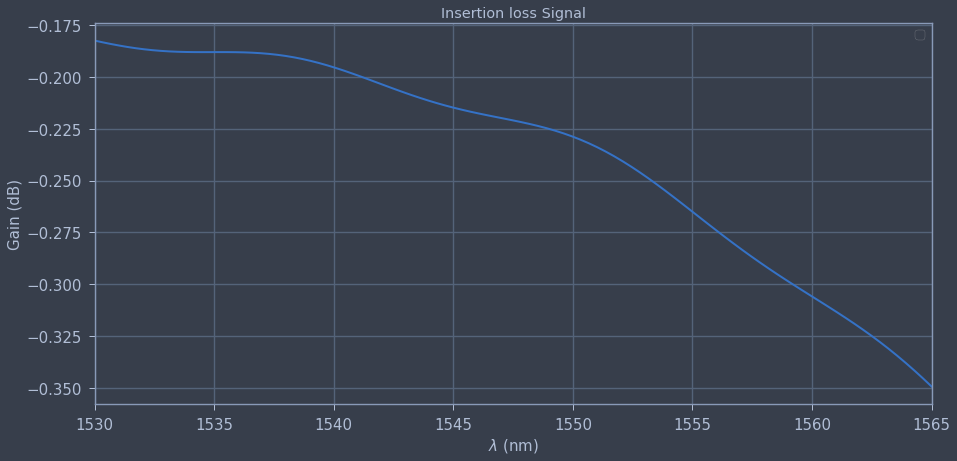

In [21]:
plt.plot(Qn['lambda']*1e9,10*np.log10(abs(Qn['T'])+abs(Qp['T'])+abs(In['T'])+abs(Ip['T'])),linewidth=2)
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Gain (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Insertion loss Signal')
plt.legend()

dict_keys(['lambda', 'f', 'T', 'Lumerical_dataset'])


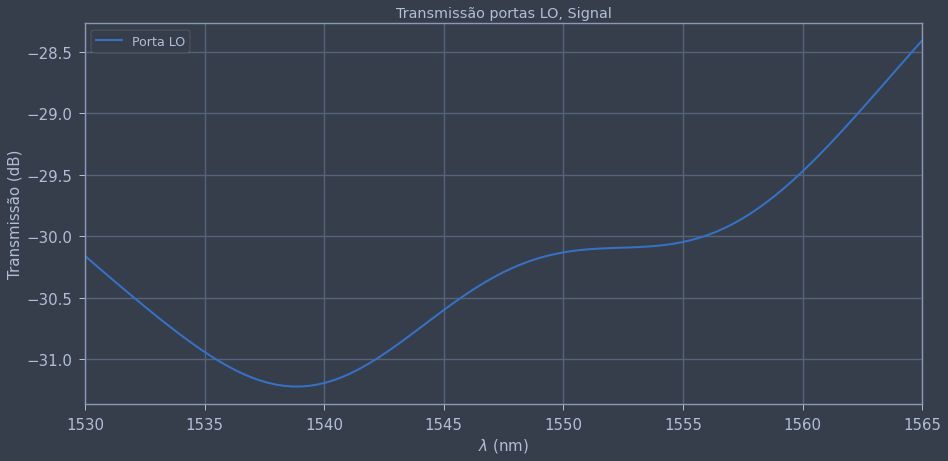

In [22]:
Qn = fdtd.getresult('FDTD::ports::LO','T')
print(Qn.keys())
plt.plot(Qn['lambda']*1e9,10*np.log10(abs(Qn['T'])),linewidth=2,label='Porta LO')



plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Transmissão (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Transmissão portas LO, Signal')
plt.legend()

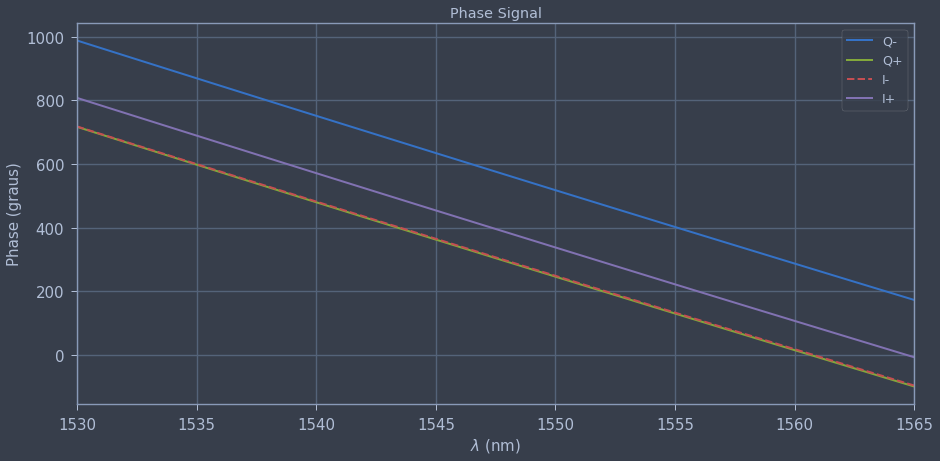

In [25]:
Qn = fdtd.getresult('FDTD::ports::Q-','S')
plt.plot(Qn['lambda']*1e9,fdtd.unwrap(fdtd.angle(Qn['S']))*180/np.pi,linewidth=2,label='Q-')
Qp = fdtd.getresult('FDTD::ports::Q+','S')
plt.plot(Qp['lambda']*1e9,fdtd.unwrap(fdtd.angle(Qp['S']))*180/np.pi,linewidth=2,label='Q+')
In = fdtd.getresult('FDTD::ports::I-','S')
plt.plot(In['lambda']*1e9,fdtd.unwrap(fdtd.angle(In['S']))*180/np.pi,'--',linewidth=2,label='I-')
Ip = fdtd.getresult('FDTD::ports::I+','S')
plt.plot(Ip['lambda']*1e9,fdtd.unwrap(fdtd.angle(Ip['S']))*180/np.pi,linewidth=2,label='I+')

plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Phase (graus)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Phase Signal')
plt.legend()

Text(0.5, 1.0, 'Phase diference Quadratura, Signal')

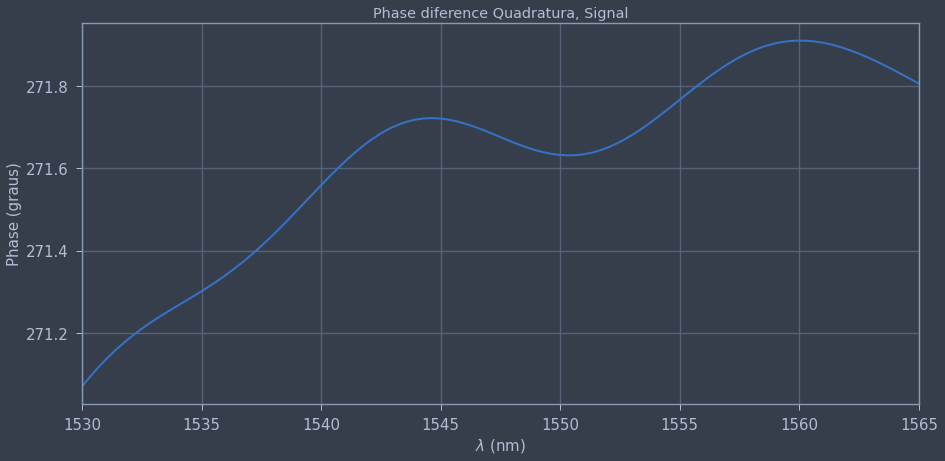

In [31]:
plt.plot(Qn['lambda']*1e9,(fdtd.unwrap(fdtd.angle(Qn['S']))-fdtd.unwrap(fdtd.angle(Qp['S'])))*180/np.pi,linewidth=2,label='Quadratura')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Phase (graus)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Phase diference Quadratura, Signal')

Text(0.5, 1.0, 'Phase diference In-Phase, Signal')

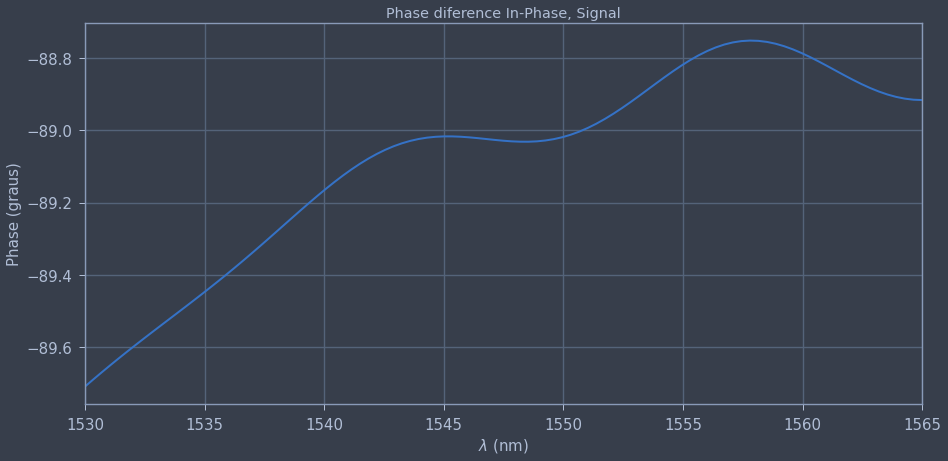

In [32]:

plt.plot(Qn['lambda']*1e9,(fdtd.unwrap(fdtd.angle(In['S']))-fdtd.unwrap(fdtd.angle(Ip['S'])))*180/np.pi,linewidth=2,label='Phase')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Phase (graus)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.title('Phase diference In-Phase, Signal')

In [34]:
np.convolve ([1, 2, 2, 5, -6, 3, -1, 1, 4, -1], [1, -3])

array([  1,  -1,  -4,  -1, -21,  21, -10,   4,   1, -13,   3])